In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [2]:
!pip install tensorflow-gpu 
!pip list

Package                           Version
--------------------------------- --------------------
absl-py                           1.1.0
aiohttp                           3.8.1
aiosignal                         1.2.0
alabaster                         0.7.12
albumentations                    1.2.1
ale-py                            0.7.4
altair                            4.2.0
anaconda-client                   1.9.0
anaconda-navigator                2.1.4
anaconda-project                  0.10.2
anyio                             3.5.0
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.2
astroid                           2.6.6
astropy                           5.0.4
asttokens                         2.0.5
astunparse                        1.6.3
async-timeout                     4.0.1
atomicwrites                      1.4.0
attrs                             21.4.0
Automat           

In [3]:

import tensorflow as tf
import os
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')


libclang                          14.0.1
llvmlite                          0.38.0
locket                            0.2.1
lockfile                          0.12.2
lxml                              4.8.0
Markdown                          3.3.4
MarkupSafe                        2.0.1
matplotlib                        3.2.2
matplotlib-inline                 0.1.2
mccabe                            0.6.1
menuinst                          1.4.18
mistune                           0.8.4
mkl-fft                           1.3.1
mkl-random                        1.2.2
mkl-service                       2.4.0
mock                              4.0.3
mpmath                            1.2.1
msgpack                           1.0.2
multidict                         5.1.0
multipledispatch                  0.6.0
munkres                           1.1.4
mypy-extensions                   0.4.3
mysql-connector-python            8.0.30
natsort                           8.1.0
navigator-updater                 

[]


zict                              2.0.0
zipp                              3.7.0
zope.interface                    5.4.0


In [4]:
os.listdir(os.path.join("data","happy"))

['05-12-21-happy-people.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1_617fd22d3f013.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '35438_hd.jpg',
 '613k1XcpYCL._SL1200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '71hBPTAhIXL.jpg',
 '8cxKy5g9i.jpg',
 '8fc39ae2301e4355a91340731ed2198f_320_320.jpeg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'A_Sep20_14_1189155141.jpg',
 'cheerful-diverse-friends-with-arms-around_53876-20695.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'friends-happy-190821.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'GettyImages-906648100-1024x684.jpg',
 'getty_143919450_9706479704500104_51510.jpg',
 'getty_152414899_9704609704

In [5]:
os.listdir('data/')

['happy', 'sad']

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)
            

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 168 files belonging to 2 classes.


In [9]:
import numpy as  np

In [10]:
batch_num = data.as_numpy_iterator()

In [11]:
batch = batch_num.next()

In [12]:
batch[0].min()

0.0

In [13]:
batch[0].max()

255.0

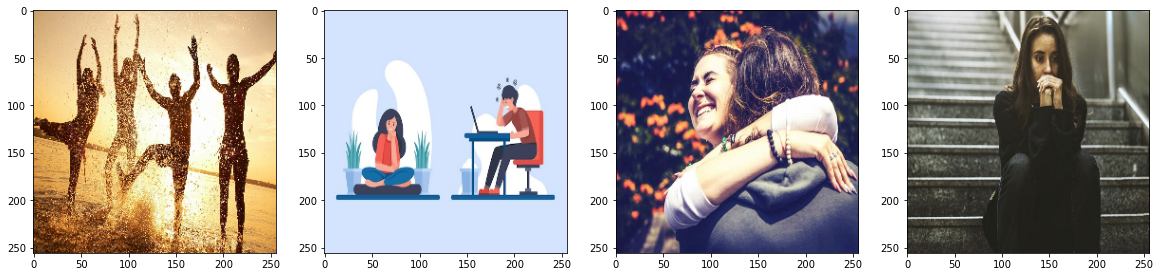

In [14]:
fig,ax = plt.subplots(ncols=4 , figsize=(20,20))
for ind , img in enumerate(batch[0][:4]):
    ax[ind].imshow(img.astype(int))

In [15]:
data = data.map(lambda x , y : (x/255,y)) # scale each image between 0 to 1

In [16]:
sample = data.as_numpy_iterator()

In [17]:
batchs = sample.next()

In [18]:
batchs[0].min()

0.0

In [19]:
batchs[0].max()

1.0

In [20]:
len(data)

6

In [21]:
train_size = int(len(data)*.7)
test_size = int(len(data)*.2)
valid_size = int(len(data)*.1)

In [22]:
train = data.take(train_size)
valid = data.skip(train_size).take(valid_size)
test = data.skip(train_size+test_size).take(test_size)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=valid, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 4s 555ms/step - loss: 0.8018 - accuracy: 0.5391
Epoch 2/20
4/4 [==============================] - 3s 561ms/step - loss: 0.7243 - accuracy: 0.4141
Epoch 3/20
4/4 [==============================] - 3s 544ms/step - loss: 0.6869 - accuracy: 0.7656
Epoch 4/20
4/4 [==============================] - 3s 556ms/step - loss: 0.6747 - accuracy: 0.7344
Epoch 5/20
4/4 [==============================] - 3s 557ms/step - loss: 0.6000 - accuracy: 0.6719
Epoch 6/20
4/4 [==============================] - 3s 586ms/step - loss: 0.5185 - accuracy: 0.7344
Epoch 7/20
4/4 [==============================] - 3s 592ms/step - loss: 0.4662 - accuracy: 0.7500
Epoch 8/20
4/4 [==============================] - 3s 588ms/step - loss: 0.3558 - accuracy: 0.8594
Epoch 9/20
4/4 [==============================] - 3s 589ms/step - loss: 0.2503 - accuracy: 0.9453
Epoch 10/20
4/4 [==============================] - 3s 612ms/step - loss: 0.2250 - accuracy: 0.9062
Epoch 11/20
4/4 [==

In [27]:
hist.history

{'loss': [0.8018149137496948,
  0.7242969274520874,
  0.6868700981140137,
  0.6746987104415894,
  0.5999860763549805,
  0.5184650421142578,
  0.4662257432937622,
  0.3557626008987427,
  0.25030282139778137,
  0.22496721148490906,
  0.1373470276594162,
  0.11570564657449722,
  0.09574607759714127,
  0.09248892217874527,
  0.07830003648996353,
  0.050714682787656784,
  0.02849254384636879,
  0.03426229953765869,
  0.014104816131293774,
  0.009818842634558678],
 'accuracy': [0.5390625,
  0.4140625,
  0.765625,
  0.734375,
  0.671875,
  0.734375,
  0.75,
  0.859375,
  0.9453125,
  0.90625,
  0.96875,
  0.9609375,
  0.96875,
  0.984375,
  0.9765625,
  0.984375,
  1.0,
  1.0,
  1.0,
  1.0]}

In [28]:
from tensorflow.keras.metrics import Accuracy,Precision,Recall

In [29]:
acc = Accuracy()
pre = Precision()
re = Recall()

In [30]:
for batch in test.as_numpy_iterator():
    x,y = batch
    ypred = model.predict(x)
    pre.update_state(y,ypred)
    re.update_state(y,ypred)
    acc.update_state(y,ypred)

1/1 [==============================] - 0s 141ms/step


In [31]:
pre.result().numpy()

1.0

In [32]:
acc.result().numpy()

0.0

In [33]:
re.result().numpy()

1.0

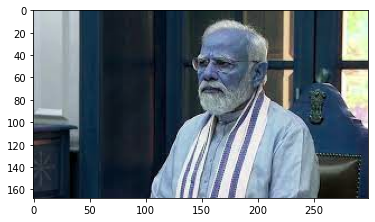

In [34]:
img = cv2.imread('sad.jpg')
plt.imshow(img)
plt.show()

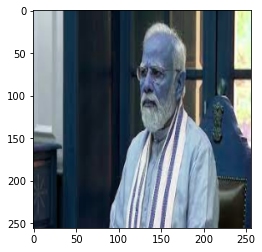

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


In [38]:
yhat

array([[0.95724094]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('models','happysad.h5'))